Dalton Nickerson<br>
Parallel Programming<br>
May 3, 2017<br>
<h1>Timing Plots for CUDA 2D Wave Approximation:</h1>
The following code was used to generate the plot from the input text file <em>"timing.txt"</em>.<br>
The data was generated with various problem sizes in doubling length increments with each size being tested 10 times for a more accurate average time measurement.
We begin by opening our data file and reading its contents.

In [2]:
labels = []
data = {}
with open('timing4Steps.txt','r') as f:
    for line in f:
        line = line.strip()
        params = line.split(' ')
        if len(labels)<1:
            labels = params
            for label in labels:
                data[label] = []
        else:
            for i in range(len(params)):
                    data[labels[i]].append(float(params[i]))
print("Data read successfully.")

Data read successfully.


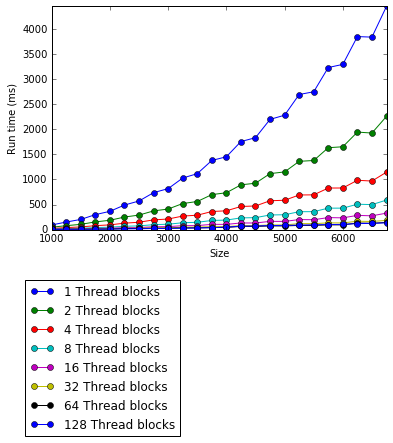

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

for i in range(1,len(labels)):
    plt.plot(data[labels[0]],data[labels[i]],'o-', label="{0} Thread blocks".format(labels[i]))
    plt.xlabel(labels[0])
    plt.ylabel("Run time (ms)")
    plt.xlim([data[labels[0]][0],data[labels[0]][-1]])
    plt.ylim([0,max(data[labels[1]])])
    lgd = plt.legend(bbox_to_anchor=(0.40,-0.20))
plt.savefig("timingPlotAllBlocks4Steps.png",bbox_extra_artists=(lgd,),bbox_inches="tight")
plt.show()

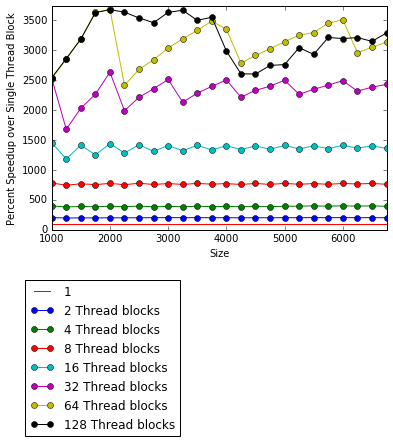

In [4]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
maxVal = 0;
plt.plot(data[labels[0]],[100 for x in range(len(data[labels[0]]))],'r-', label=labels[1])
for i in range(2,len(labels)):
    listScaled = [(data[labels[1]][x]/data[labels[i]][x]) * 100 for x in range(len(data[labels[0]]))]
    maxVal = max(maxVal,max(listScaled))
    plt.plot(data[labels[0]],listScaled,'o-', label="{0} Thread blocks".format(labels[i]))
    plt.xlabel(labels[0])
    plt.ylabel("Percent Speedup over Single Thread Block")
plt.xlim([data[labels[0]][0],data[labels[0]][-1]])
plt.ylim([0,maxVal+50])
lgd = plt.legend(bbox_to_anchor=(0.40,-0.20))
plt.savefig("timingPlotSpeedUpAllBlocks4Steps.png",bbox_extra_artists=(lgd,),bbox_inches="tight")
plt.show()

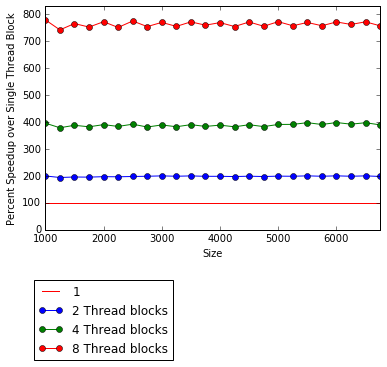

In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
maxVal = 0;
plt.plot(data[labels[0]],[100 for x in range(len(data[labels[0]]))],'r-', label=labels[1])
for i in range(2,len(labels)//2+1):
    listScaled = [(data[labels[1]][x]/data[labels[i]][x]) * 100 for x in range(len(data[labels[0]]))]
    maxVal = max(maxVal,max(listScaled))
    plt.plot(data[labels[0]],listScaled,'o-', label="{0} Thread blocks".format(labels[i]))
    plt.xlabel(labels[0])
    plt.ylabel("Percent Speedup over Single Thread Block")
plt.xlim([data[labels[0]][0],data[labels[0]][-1]])
plt.ylim([0,maxVal+50])
lgd = plt.legend(bbox_to_anchor=(0.40,-0.20))
plt.savefig("timingPlotSpeedUpSmallBlocks4Steps.png",bbox_extra_artists=(lgd,),bbox_inches="tight")
plt.show()

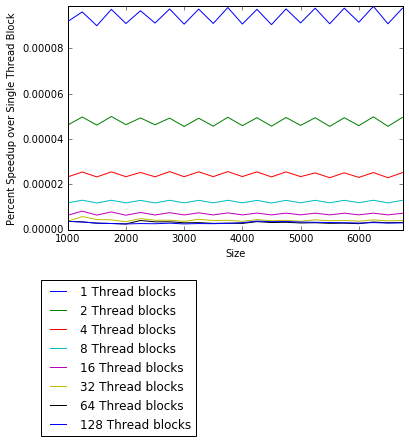

In [6]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
maxVal = 0
minVal = 100
for i in range(1,len(labels)):
    listScaled = [(data[labels[i]][x]/(data[labels[0]][x]*data[labels[0]][x])) for x in range(len(data[labels[0]]))]
    maxVal = max(maxVal,max(listScaled))
    minVal = min(minVal,min(listScaled))
    plt.plot(data[labels[0]],listScaled,'-', label="{0} Thread blocks".format(labels[i]))
    plt.xlabel(labels[0])
    plt.ylabel("Percent Speedup over Single Thread Block")
plt.xlim([data[labels[0]][0],data[labels[0]][-1]])
plt.ylim([0,maxVal])
lgd = plt.legend(bbox_to_anchor=(0.40,-0.20))
plt.savefig("timePerSubdivision4Steps.png",bbox_extra_artists=(lgd,),bbox_inches="tight")
plt.show()

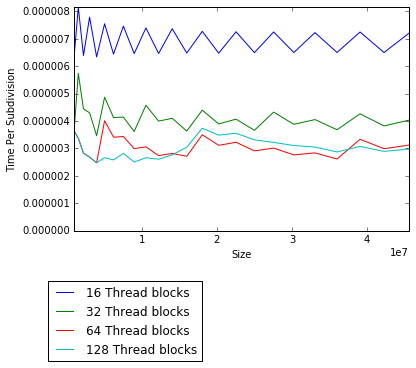

In [9]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
maxVal = 0
minVal = 100
sizeValues = [(data[labels[0]][x]*data[labels[0]][x]) for x in range(len(data[labels[0]]))]
for i in range(1+len(labels)//2,len(labels)):
    listScaled = [(data[labels[i]][x]/sizeValues[x]) for x in range(len(data[labels[0]]))]
    maxVal = max(maxVal,max(listScaled))
    minVal = min(minVal,min(listScaled))
    plt.plot(sizeValues,listScaled,'-', label="{0} Thread blocks".format(labels[i]))
    plt.xlabel(labels[0])
    plt.ylabel("Time Per Subdivision")
plt.xlim([sizeValues[0],sizeValues[-1]])
plt.ylim([0,maxVal])
lgd = plt.legend(bbox_to_anchor=(0.40,-0.20))
plt.savefig("timePerSubdivisionSmall4Steps.png",bbox_extra_artists=(lgd,),bbox_inches="tight")
plt.show()